In [39]:
# All Imports
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 2
---

$$
\text{Data Error} = f(\widetilde{x}) - f(x) \\
$$
Where,

$\widetilde{x}$ is an inexact measurement of x. In this case, $\widetilde{x}$ is the inexact measurement of $\pi$.

### Assumptions
1. I am assuming that inbuilt the value of pi (np.pi) is sufficiently accurate approximation of $\pi$.

### Given function

$$
f(x) = cos(2 \pi x)
$$

In [40]:
part2_function = lambda x, pi: np.cos(2 * pi * x)

### Defining the various measurements of $\pi$:

In [41]:
real_pi = np.pi
# use real pi to get values at various precisions
# +2 includes the first and the last digit
pi_values = [float(str(real_pi)[:i]) for i in range(2, 10+2)]
print(f'These are the pi values at various precisions ranging from [0 to {len(pi_values)-1}] decimals placees')
print(pi_values)

These are the pi values at various precisions ranging from [0 to 9] decimals placees
[3.0, 3.1, 3.14, 3.141, 3.1415, 3.14159, 3.141592, 3.1415926, 3.14159265, 3.141592653]


### Plotting function $f(x)$ with various precisions of $\pi$ compared to the inbuilt value of $\pi$:

In [42]:
def plot_function(domain_start: int, domain_end: int, n: int = 0.001):
    x_values = np.arange(domain_start, domain_end, n)
    real_y = [part2_function(x, real_pi) for x in x_values]
    y_values = [[part2_function(x, pi) for x in x_values] for pi in pi_values]

    # plt.figure(dpi=PLOT_DPI)
    for i, y in enumerate(y_values):
        plt.plot(x_values, y, label=f"cos(2πx) pi={pi_values[i]}")

    plt.plot(x_values, real_y, color='black', label=f"cos(2πx) real")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('cos(2πx) with different values of pi')
    plt.show()

#### What happens to the plot around the point 0

Around the point 0, as shown below - most of the values of pi have a decent approximation of the true value of pi; however as the value of $x$ (domain) increases, the error in the approximation of $\pi$ increases. Although the error increases, it only appears to be growing significantly when the value of $\pi$ is represented with less than 2 decimal places; more than 2 decimal places, the error does not appear significant.

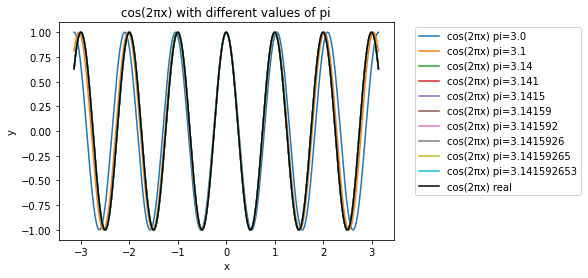

In [43]:
plot_function(-np.pi, np.pi)

#### What happens at large values of x?

Now, lets observe what happens when the value of $x$ grows.
As shown in the plot below, the error in pi values with less than 2 decimal places have grown quite a bit, furthermore, we can also observe that the value with 2 decimal place (i.e. 3.14) is also starting to show some deviation from the true valie, however, the error is still not significant. The values of pi with 3+ decimal places are basically overlapping with the true value of pi.

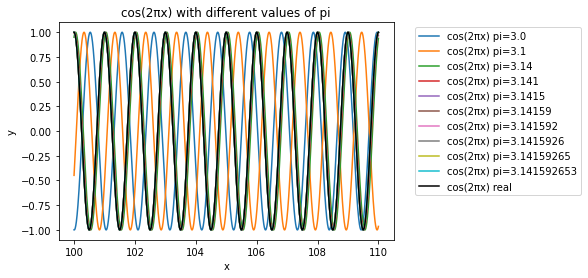

In [44]:
plot_function(100, 110)

#### Closely examining the plot at large values of x

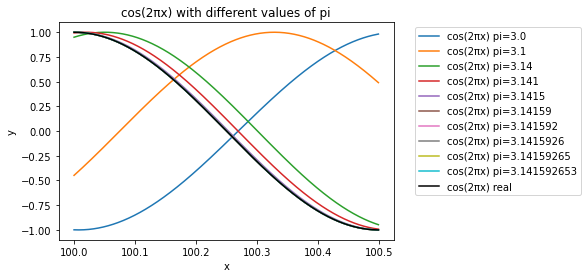

In [57]:
plot_function(100, 100.5)

#### Lets to even larger to see if the results are consistent
As shown below, the values of pi with more decimal places are more close to the true value of pi and hence have less error.

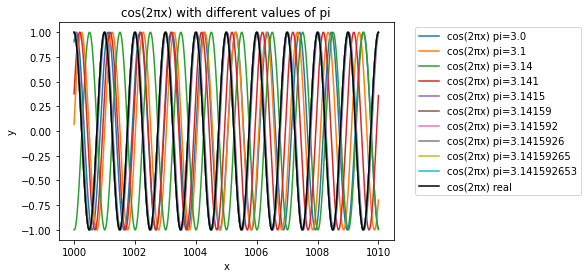

In [45]:
plot_function(1000, 1010)

#### What does this mean for the accuracy of the function?

Depending on the use case of the function and if you're dealing with small values of x, the function is fairly accurate with even 2 decimal places of pi. However, if you're dealing with large values of x, you would need more decimal places of pi to get an accurate result.

### Plotting the error in the function $f(x)$ with various precisions of $\pi$ compared to the inbuilt value of $\pi$:

In [46]:
def get_data_error(domain_start: int, domain_end: int, pi_value, n: int = 1000):
    x_values = np.linspace(domain_start, domain_end, n)
    real_y = [part2_function(x, real_pi) for x in x_values]
    y_values = [part2_function(x, pi_value) for x in x_values]
    # data error = f(estimate) - f(real)
    data_error = [real_y[i] - y_values[i] for i in range(n)]
    return data_error

In [47]:
def plot_error(domain_start: int, domain_end: int, n: int = 1000):
    # get data error for all pi values
    data_errors = [get_data_error(domain_start, domain_end, pi, n) for pi in pi_values]
    x_values = np.linspace(domain_start, domain_end, n)
    # plt.figure(dpi=PLOT_DPI)
    for i, error in enumerate(data_errors):
        plt.plot(x_values, error, label=f"pi={pi_values[i]}")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlabel('x')
    plt.ylabel('error')
    plt.title('Error in cos(2πx) with different values of pi')
    plt.show()

#### Error vs x
The plot below shows how fast the error grows as the value of x increases. As we can see, the error grows significantly when the value of pi is represented with less than 2 decimal places. The error is almost negligible when the value of pi is represented with 2+ decimal places.

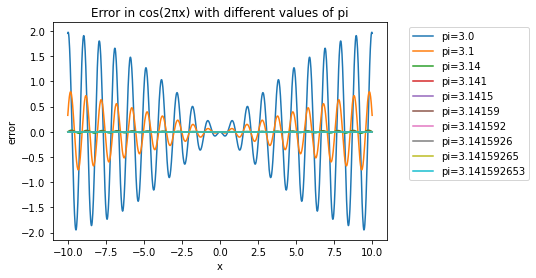

In [48]:
plot_error(-10, 10)

#### Error vs x for large values of x
As x grows we can again see that the error for pi values with less than 3 decimal places is significant. The error for pi values with 3+ decimal places is almost negligible.

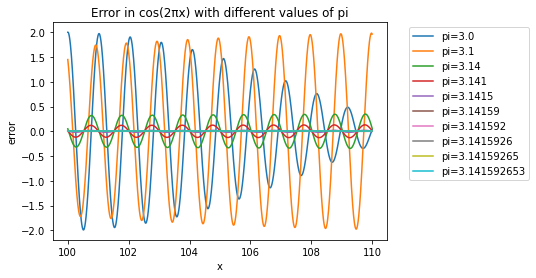

In [49]:
plot_error(100, 110)